In [1]:
import numpy as np
import torch
from soma import aims, aimsalgo
import matplotlib.pyplot as plt
import contrastive
from contrastive.augmentations import *

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
INFO:numexpr.utils: Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils: NumExpr defaulting to 8 threads.


In [2]:
dir_crop = '/volatile/jl277509/data/UkBioBank/crops/2mm/CINGULATE/mask/'
subject = 'sub-6024754'
skel = aims.read(dir_crop+'Rcrops/'+subject+'_cropped_skeleton.nii.gz')
skel = skel.np
skel = torch.tensor(skel)
foldlabel = aims.read(dir_crop+'Rlabels/'+subject+'_cropped_foldlabel.nii.gz')
foldlabel = foldlabel.np
foldlabel = torch.tensor(foldlabel)
distbottom = aims.read(dir_crop+'Rdistbottom/'+subject+'_cropped_distbottom.nii.gz')
distbottom = distbottom.np
distbottom = torch.tensor(distbottom)

In [3]:
print(np.sum(distbottom.numpy()<10000))
print(np.sum(skel.numpy()!=0))
print(np.sum(foldlabel.numpy()!=0))

371
372
372


In [4]:
skel_ = skel.numpy().copy()
skel_[distbottom.numpy() < 50]=0
np.sum(skel_)

14425

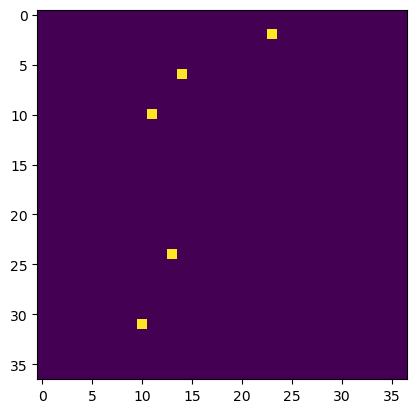

In [5]:
plt.imshow((distbottom.numpy()<100)[10,:,:,0])
plt.show()

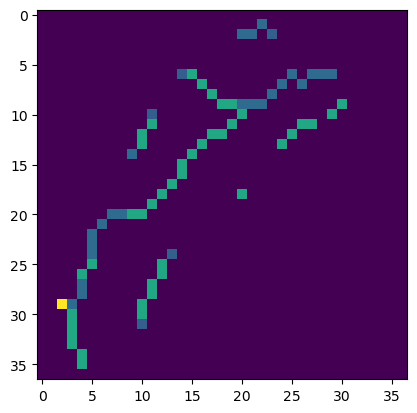

In [6]:
plt.imshow(skel.numpy()[10,:,:,0])
plt.show()

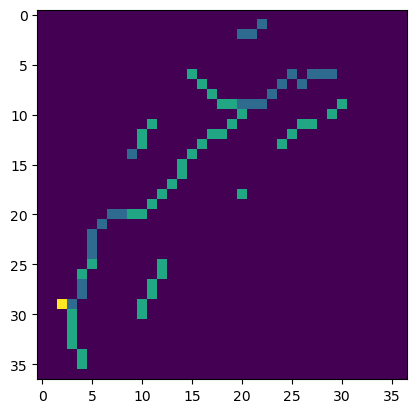

In [7]:
plt.imshow(skel_[10,:,:,0])
plt.show()

In [8]:
print(np.unique(foldlabel))

[   0 1030 1048 1093 1095 1096 1099 1122 1133 1141 1144 1162 1167 1172
 1181 1208 5099 5133 6030 6048 6093 6096 6099 6122 6133 6141 6144 6162
 6167 6172 7042 7048 7093 7095 7096 7099 7122 7133 7139 7141 7144 7162
 7167 7172 7181 7183 7206 7208]


In [9]:
print(np.unique(distbottom))

[    0   100   141   173   200   241   273   282   300   314   341   373
   382   400   414   423   441   446   455   473   482   514   523   555
   582   587 32500 32501]


In [11]:
trimdepth = contrastive.augmentations.TrimDepthTensor(distbottom, foldlabel,
                            max_distance=200,
                            input_size=[1, 16, 37, 37],
                            keep_top=False,
                            uniform=False)

AttributeError: module 'contrastive.augmentations' has no attribute 'TrimDepthTensor'

In [103]:
view1 = trimdepth(skel)

3 -1 0 372 3
1 200 233 139 0
11 200 233 139 2
17 200 233 139 7
3 200 233 139 0
8 200 233 139 4
166 200 233 139 84
7 200 233 139 4
26 -1 0 372 26
3 -1 0 372 3
20 200 233 139 1
15 200 233 139 1
29 200 233 139 12
13 200 233 139 1
22 200 233 139 1
8 -1 0 372 8
1 -1 0 372 1
2 -1 0 372 2
17 -1 0 372 17


In [104]:
skel_nifti = aims.read(dir_crop+'Rcrops/'+subject+'_cropped_skeleton.nii.gz')
aims.write(skel_nifti, f'/volatile/jl277509/data/test_augmentations/{subject}_cingulate.nii.gz')
mesher = aimsalgo.Mesher()
mesher.setVerbose(False)
mesher.setDecimation(100.0, 5, 3, 180.0)
mesher.setMinFacetNumber(50)
mesh = aims.AimsSurfaceTriangle()
# bck est le bucket a mailler
mesher.getBrain(skel_nifti, mesh)
aims.write(mesh, f'/volatile/jl277509/data/test_augmentations/{subject}_cingulate.mesh')

In [105]:
print(np.unique(skel_nifti.np))
print(np.sum(skel_nifti))
print(skel_nifti.np.dtype)
print(skel_nifti.shape)

[  0  30  35  60 100 120]
17665
int16
(16, 37, 37, 1)


In [106]:
print(np.unique(view_nifti.np))
print(np.sum(view_nifti))
print(view_nifti.np.dtype)
print(view_nifti.shape)

[  0  30  35  60 100 120]
13235
int16
(16, 37, 37, 1)


In [107]:
view_np = (view1.numpy()).astype(np.int16)
view_nifti = aims.Volume(view_np)
aims.write(view_nifti, f'/volatile/jl277509/data/test_augmentations/{subject}_cingulate_trimedpeth.nii.gz')
mesher = aimsalgo.Mesher()
mesher.setVerbose(False)
mesher.setDecimation(100.0, 5, 3, 180.0)
mesher.setMinFacetNumber(50)
mesh = aims.AimsSurfaceTriangle()
# bck est le bucket a mailler
mesher.getBrain(view_nifti, mesh)
aims.write(mesh, f'/volatile/jl277509/data/test_augmentations/{subject}_cingulate_trimdepth.mesh')

In [108]:
print(np.sum(view1.numpy().astype(bool)))

177


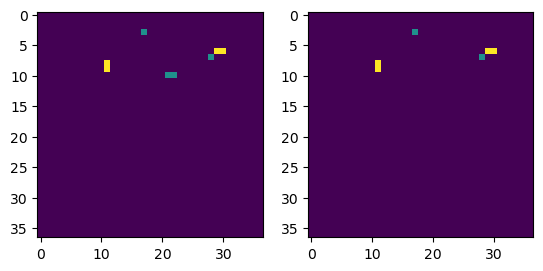

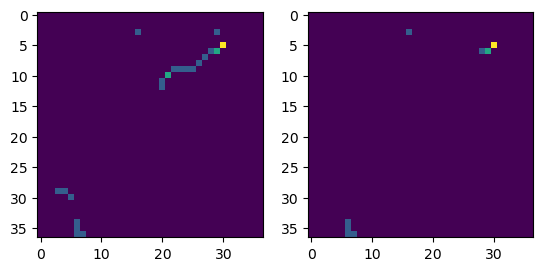

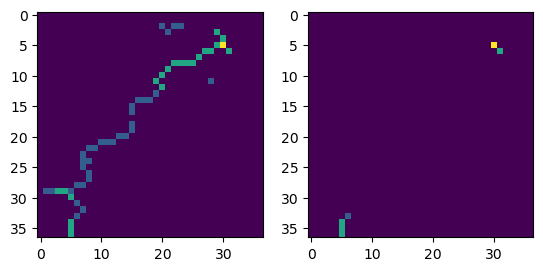

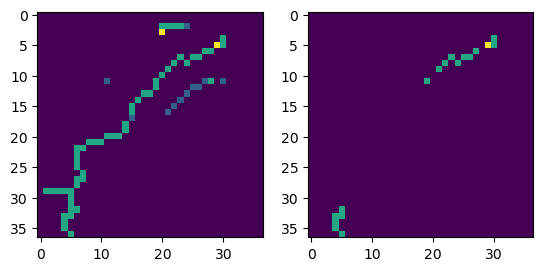

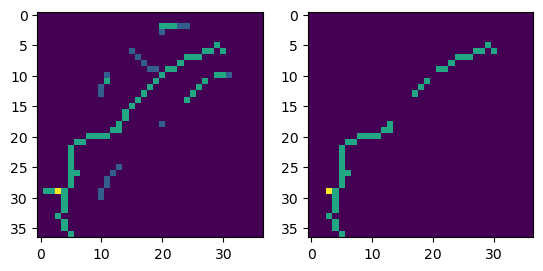

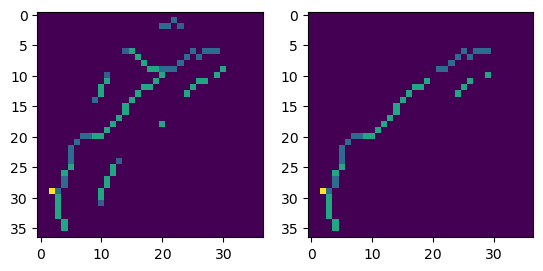

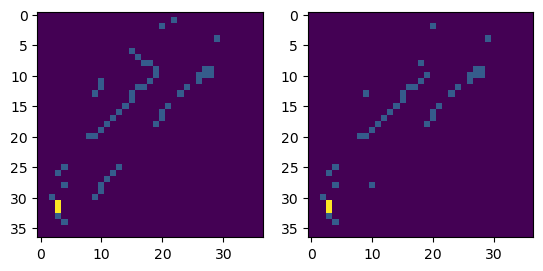

In [109]:
for idx in range(5,12):
    fig, axs = plt.subplots(ncols=2)
    axs[0].imshow(skel.numpy()[idx,:,:,0])
    axs[1].imshow(view1.numpy()[idx,:,:,0])
    plt.show()